<a href="https://colab.research.google.com/github/georginamihailova/Introduction-to-Data-Science/blob/main/Lab_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#<font color = 'Orange'>Scraping page</font>
You need to scrape the phones with their price from: https://mobelix.com.mk/mk/mobilni-telefoni

The informations you need to extract are:


*   Phone brand: html tag (\<h5 class="mb-0">\)
*   Phone type: html tag (\<h3 class="h5 font-weight-normal">\)
*   Phone pruce: html tag (\<p class="h5 price">\)



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# <font color='Orange'>Requirements specified for Web Scraping</font> (0.1 POINTS)


Import all libraries and modules that you are going to use.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import requests

import warnings
requests.packages.urllib3.disable_warnings()
warnings.filterwarnings("ignore")

# <font color = 'Orange'> Start the scraping by sending HTTP request</font> (0.3 POINTS)


 **Fetch a website's content - send request**

In [ ]:
base_url = ' https://mobelix.com.mk/mk/mobilni-telefoni'
page = 0
has_next = False
data = []

while not has_next:
  url = f"{base_url}?page={page}"

  response=requests.get(url)


  html = BeautifulSoup(response.text,'html.parser')

  data+=html.find_all('div',{'class' : "border border-0 bg-white rounded px-3 pb-3 pt-1 row mx-0 align-items-center"})

  has_next = bool(html.find('li', class_='page-item', attrs={'aria-disabled': 'true', 'aria-label': 'pagination.next'}))
  page+=1


**Get the response-status code and see:**
<li>If the code starts with a 2, it means the request was successful.



In [ ]:
print(response)

<Response [200]>


# <font color = 'orange'>Parse the HTML with BeautifulSoup</font> (0.3 POINTS)

Beautiful Soup is a Python library for pulling data out of HTML and XML files. It works with your favorite parser to provide idiomatic ways of navigating, searching, and modifying the parse tree. It commonly saves programmers hours or days of work.


**Parse using BeautifulSoap**




**Print the HTML code that you get**

In [ ]:
print(html)

<!DOCTYPE html>

<html lang="en">
<head>
<!-- Required meta tags -->
<meta charset="utf-8"/>
<title>Мобилни телефони | Mobelix Premium Mobilara</title>
<meta content="width=device-width, initial-scale=1, shrink-to-fit=no" name="viewport"/>
<meta content="Мобилни телефони | Mobelix Премиум Мобилара" name="title"/>
<meta content="Mobile Store I Service | Mobelix Premium Mobilara Skopje нуди најголем избор на премиум додатоци за мобилни телефони: маски за мобилни телефони, диспеј, полначи, полначи за кола, бежични полначи, power bank, bluetooth слушалки, usb кабли, фолии и стакла за дисплеј и др." name="description"/>
<meta content="mobilara, mobilara skopje, mobilni dodatoci, мобилни додатоци, полначи, бежични полначи, power bank, Bluetooth slusalki, maski za telefoni" name="keywords"/>
<meta content="Mobelix Премиум Мобилара" property="og:site_name">
<meta content="http://mobelix.com.mk/mk/mobilni-telefoni?page=22" property="og:url">
<meta content="Мобилни телефони | Mobelix Премиум Моб

# <font color='Orange'>Extracting data</font> (0.7 POINTS)

From the printed HTML code search for the data you need for building the dataset, by the classes that are given above in the html tags listed.



**Try to select the first element from your attributes. Find out from the html code what part do you need.**

In [ ]:
brand = data[0].select_one('h5.mb-0').text
pType = data[0].select_one('h3.h5.font-weight-normal').text
price = data[0].select_one('p.h5.price').text
print(brand + " " + pType + " " + price)


Blackberry Porsche Design P9981 19,000.00 ден


**Add as many codeboxes as you need for selecting all the html elements**

In [ ]:
brands = []
pTypes = []
prices_2 = []

for item in data:
  brands.append(item.find('h5', {'class' : 'mb-0'}).text.strip())
  pTypes.append(item.find('h3',{'class': 'h5 font-weight-normal'}).text.strip())
  prices_2.append(item.find('p',{'class':'h5 price'}).text.strip())
print(prices_2)

['19,000.00 ден', '9,200.008,300.00 ден', '10,500.008,300.00 ден', '67,600.0061,500.00 ден', '94,100.0089,200.00 ден', '80,000.0078,100.00 ден', '116,900.0098,400.00 ден', '58,500.0055,300.00 ден', '47,990.0046,800.00 ден', '19,000.00 ден', '9,200.008,300.00 ден', '10,500.008,300.00 ден', '67,600.0061,500.00 ден', '94,100.0089,200.00 ден', '80,000.0078,100.00 ден', '116,900.0098,400.00 ден', '58,500.0055,300.00 ден', '47,990.0046,800.00 ден', '48,000.0044,800.00 ден', '66,400.00 ден', '94,100.0089,200.00 ден', '61,500.0056,600.00 ден', '116,900.0098,400.00 ден', '58,500.0055,300.00 ден', '64,600.0061,500.00 ден', '67,600.0061,500.00 ден', '47,990.0046,800.00 ден', '61,500.0060,300.00 ден', '73,800.0067,600.00 ден', '89,200.0086,200.00 ден', '48,000.0044,800.00 ден', '83,000.0076,900.00 ден', '55,300.0052,300.00 ден', '104,600.0098,400.00 ден', '64,600.0061,500.00 ден', '64,600.0060,300.00 ден', '86,100.0083,000.00 ден', '113,800.00104,600.00 ден', '43,000.0040,000.00 ден', '122,900.001

**Create lists with the extracted data from the html elements that you selected**

In [ ]:
prices = []
for price in prices_2:
    price_element = price.split(".")

    if len(price_element) > 2:
      price_2 = price_element[1]
      price_2 = price_2.lstrip('0').replace(',','')
      prices.append(float(price_2))
    else:
      price_element[0] = price_element[0].replace(',','')
      prices.append(float(price_element[0]))



**Print all lists that are containing the elements**

In [ ]:
print(brands)
print(prices)
print(pTypes)

['Blackberry', 'Samsung', 'Samsung', 'Apple', 'Apple', 'Apple', 'Apple', 'Apple', 'Apple', 'Blackberry', 'Samsung', 'Samsung', 'Apple', 'Apple', 'Apple', 'Apple', 'Apple', 'Apple', 'Apple', 'Apple', 'Apple', 'Apple', 'Apple', 'Apple', 'Apple', 'Apple', 'Apple', 'Apple', 'Apple', 'Apple', 'Apple', 'Apple', 'Apple', 'Apple', 'Apple', 'Apple', 'Apple', 'Apple', 'Apple', 'Apple', 'Apple', 'Apple', 'Apple', 'Apple', 'Apple', 'Apple', 'Apple', 'Apple', 'Apple', 'Apple', 'Apple', 'Apple', 'Apple', 'Apple', 'Apple', 'Apple', 'Samsung', 'Apple', 'Samsung', 'Huawei', 'One Plus', 'Apple', 'Oppo', 'Oppo', 'Apple', 'Apple', 'Apple', 'Honor', 'Nokia', 'Nokia', 'Honor', 'Samsung', 'Xiaomi', 'Xiaomi', 'Samsung', 'Oppo', 'Xiaomi', 'Xiaomi', 'Xiaomi', 'Xiaomi', 'Xiaomi', 'Samsung', 'Samsung', 'Apple', 'Xiaomi', 'Apple', 'One Plus', 'Samsung', 'Xiaomi', 'Samsung', 'Xiaomi', 'Xiaomi', 'Xiaomi', 'Xiaomi', 'Honor', 'Honor', 'ASUS', 'Xiaomi', 'Xiaomi', 'Google', 'Google', 'Samsung', 'Samsung', 'Nothing', 'Xi

**Check if all lists are the same size**

In [ ]:
len(prices) == len(brands) == len(pTypes)

True

# <font color='Orange'>Create a Pandas DataFrame</font> (0.1 POINTS)


**Create the DataFrame from the lists you get and name your *Columns***

In [ ]:
data_table = []
for i in range(0,len(brands)):
  item = {}
  item['Brand'] = brands[i]
  item['Type'] = pTypes[i]
  item['Price'] = prices[i]
  data_table.append(item)
df = pd.DataFrame(data_table)



**Print the dataset you obtain**

In [ ]:
print(df)

          Brand                           Type    Price
0    Blackberry           Porsche Design P9981  19000.0
1       Samsung             Galaxy A03s 4/64GB   8300.0
2       Samsung             Galaxy A04s 3/32GB   8300.0
3         Apple  iPhone 14 Pro Max 128GB E-SIM  61500.0
4         Apple            iPhone 14 Pro 512GB  89200.0
..          ...                            ...      ...
195       Apple                    AirPods Max  40000.0
196       Apple                   HomePod Mini  11000.0
197      Xiaomi          Poco M3 4GB RAM/128GB  12290.0
198    One Plus         Nord N10 6GB RAM/128GB  19700.0
199    One Plus             8 Pro 12GB Ram/256  40000.0

[200 rows x 3 columns]


#<font color='orange'>EDA</font> (0.2 POINTS)

## <font color='Orange'>Find statistic elements for the prices</font>
Like mean, median,  standard deviation, minimum, maximum

In [ ]:
print(df['Price'].mean())
print(df['Price'].median())
print(df['Price'].std())
print(df['Price'].min())
print(df['Price'].max())

42347.8
39000.0
29247.022734874594
4300.0
215200.0


# <font color = 'Orange'>Data visualization </font> (0.3 POINTS)

Make a histogram & bar chart for the price values

> `Indented block`



Text(0, 0.5, 'Frequency')

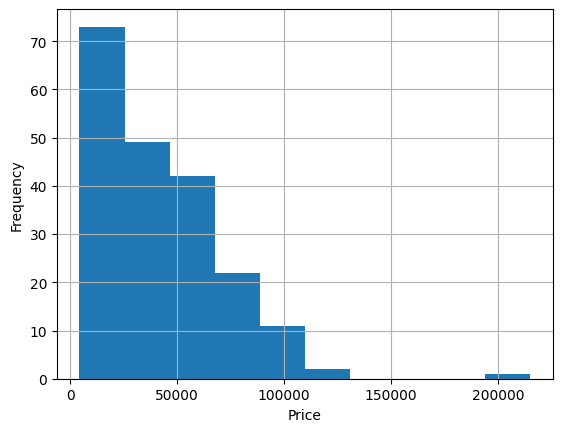

In [ ]:
df['Price'].hist()
plt.xlabel('Price')
plt.ylabel('Frequency')

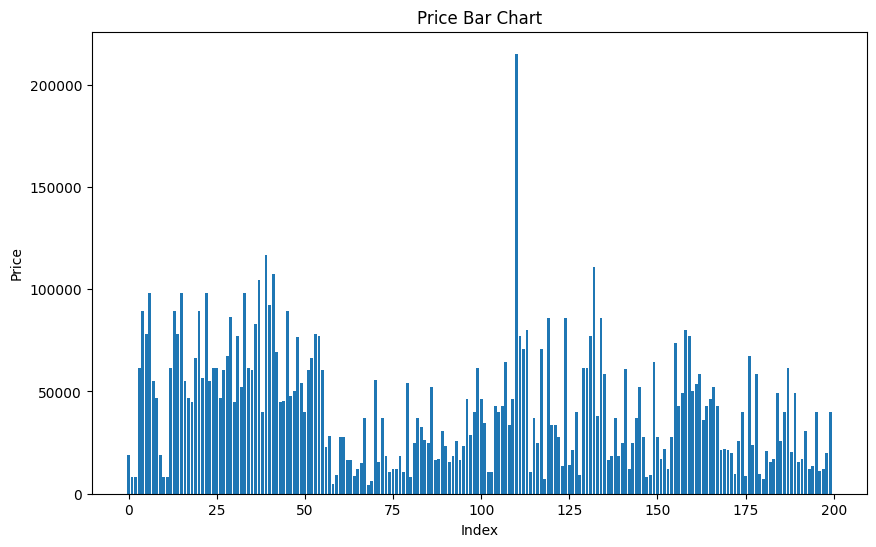

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(range(len(prices)), prices)
plt.title('Price Bar Chart')
plt.xlabel('Index')
plt.ylabel('Price')
plt.show()